### 1 

Descargue MEPX, https://www.mepx.org/, estúdielo y corra uno de los ejemplos que trae.


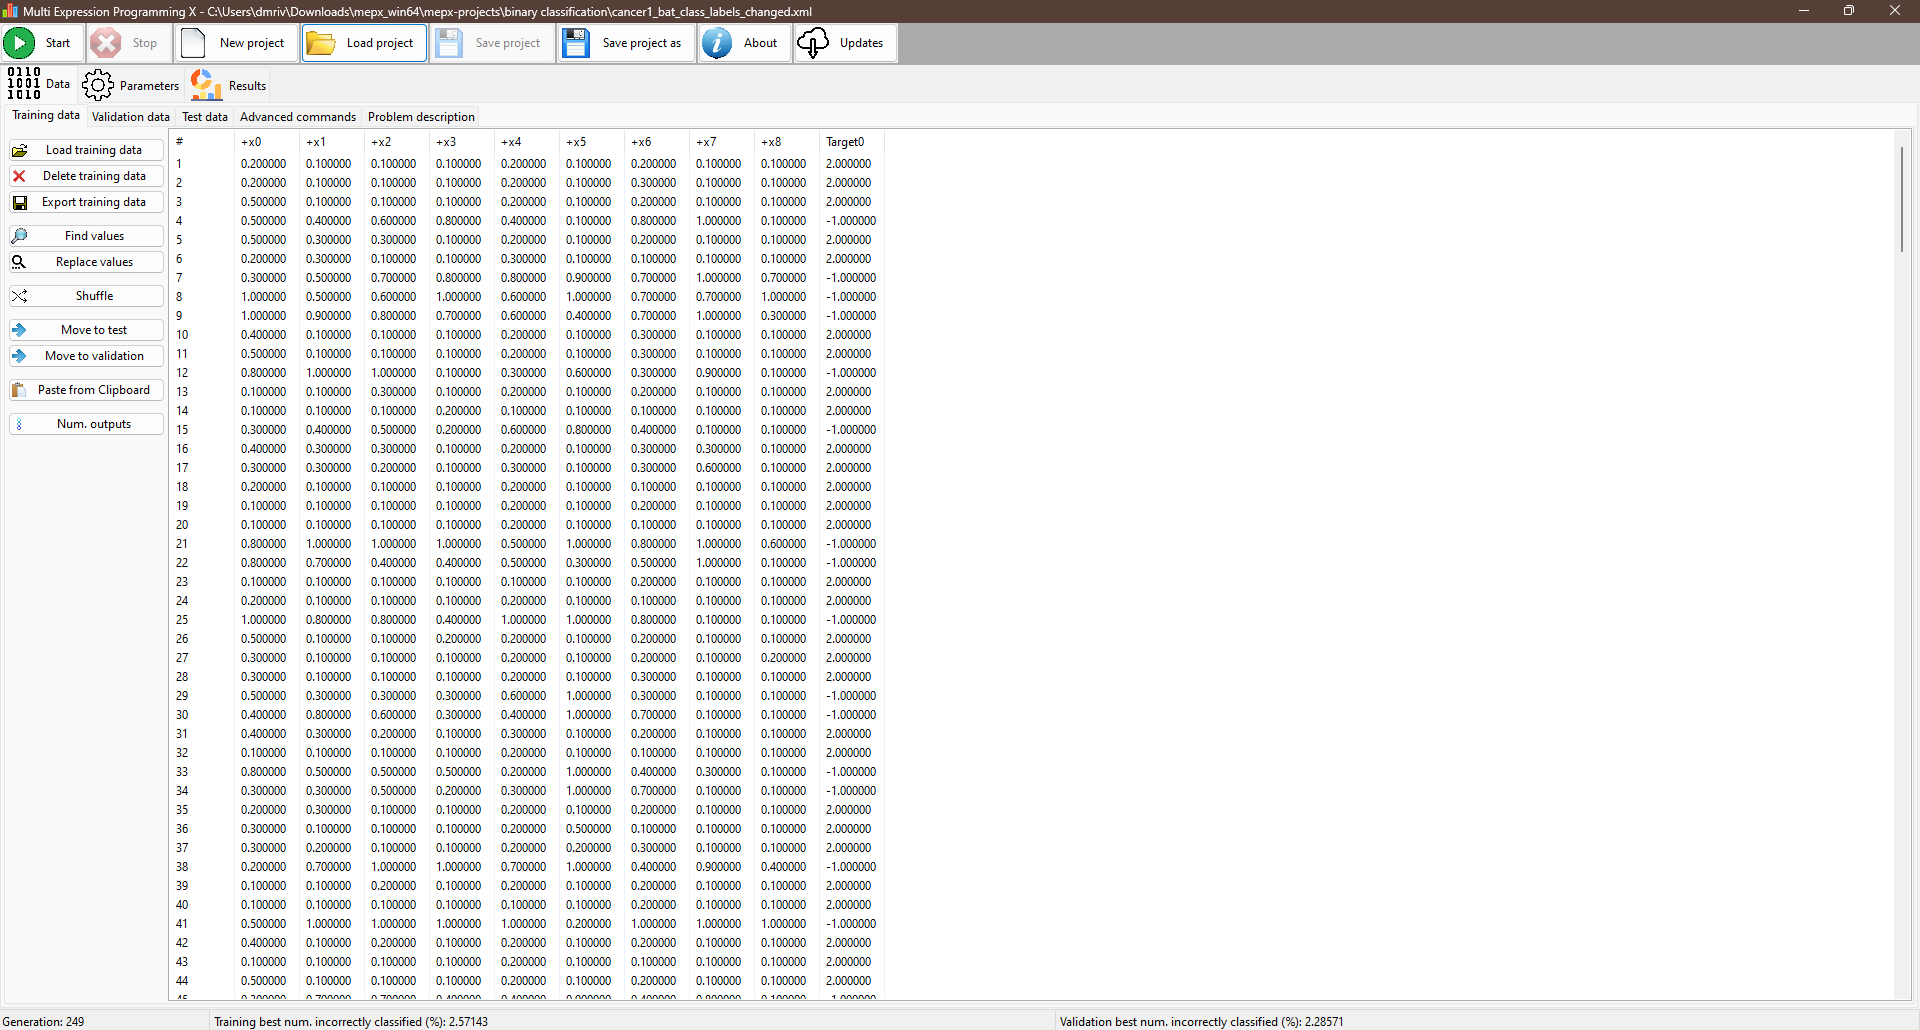

- classification problem

Predicts breast cancer.

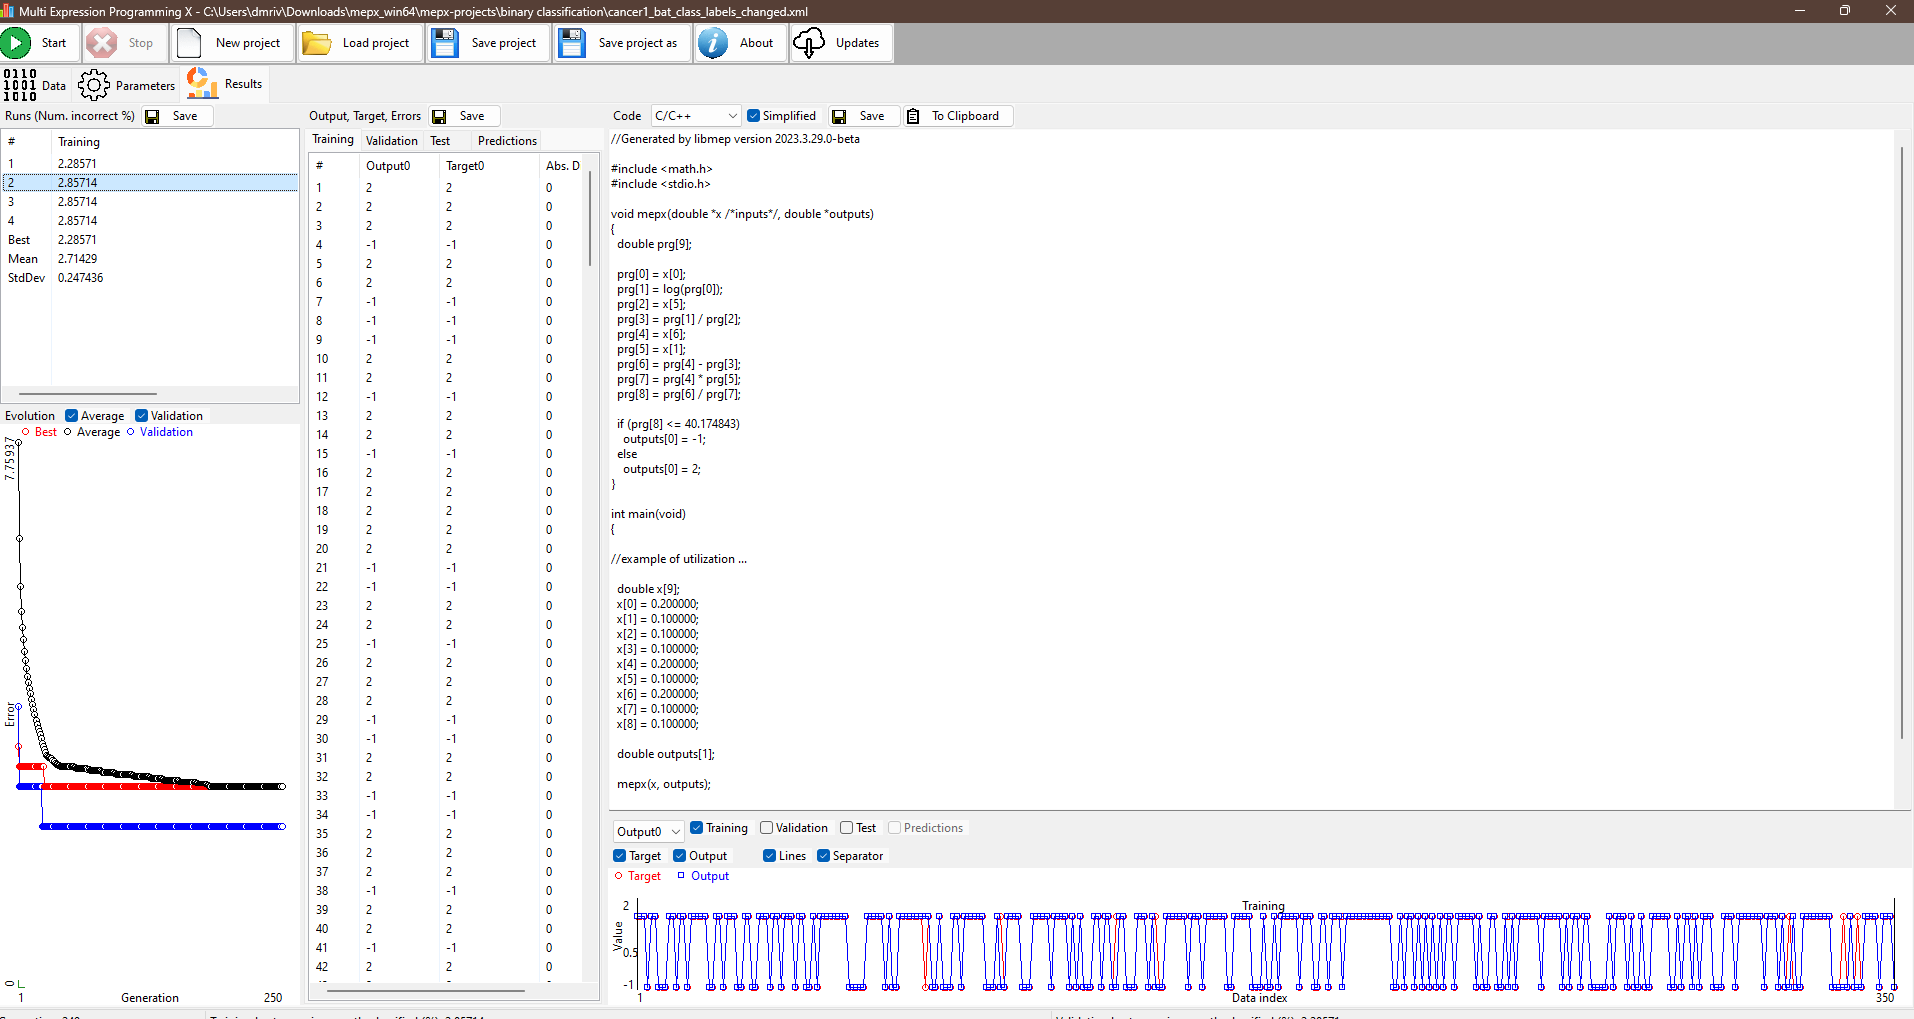

### 3. Programacion Genetica

Suponga que desea utilizar Programación Genética para encontrar el diseño de un circuito
lógico, tome como, ejemplo el codificador de 7 segmentos. Describa el conjunto de
terminales, el conjunto de funciones y la función de aptitud. Use una librería de Python.

Conjunto de terminales:
Las entradas binarias: 'a', 'b', 'c', 'd' (representando los 4 bits de entrada)
Las constantes lógicas: True, False

Conjunto de funciones:
Operadores lógicos: AND, OR, NOT, XOR

Función de aptitud:
La función de aptitud evaluará qué tan bien el circuito generado por la Programación Genética se ajusta al comportamiento deseado del codificador de 7 segmentos.
Podemos comparar las salidas del circuito generado con las salidas esperadas para cada combinación de entrada y asignar una puntuación de aptitud basada en el número de coincidencias.

In [2]:
pip install deap

  Using cached deap-1.4.1-cp312-cp312-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
import random
from deap import base, creator, tools, gp
import operator
from deap import algorithms

pset = gp.PrimitiveSet("MAIN", 4)
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.not_, 1)
pset.addPrimitive(operator.xor, 2)
pset.addTerminal(True)
pset.addTerminal(False)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalCircuit(individual, inputs, outputs):
    func = toolbox.compile(expr=individual)
    score = 0
    for i in range(len(inputs)):
        result = func(*inputs[i])
        if result == outputs[i]:
            score += 1
    return score,

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)


population_size = 100
num_generations = 50
crossover_probability = 0.7
mutation_probability = 0.1


population = toolbox.population(n=population_size)

inputs = [
    (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1),
    (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1),
    (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1),
    (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)
]
outputs = [
    0x7E, 0x30, 0x6D, 0x79, 0x33, 0x5B, 0x5F, 0x70,
    0x7F, 0x7B, 0x77, 0x1F, 0x4E, 0x3D, 0x4F, 0x47
]
for individual in population:
    individual.fitness.values = evalCircuit(individual, inputs, outputs)

for generation in range(num_generations):
    offspring = toolbox.select(population, len(population))
    offspring = algorithms.varAnd(offspring, toolbox, crossover_probability, mutation_probability)
    
    for individual in offspring:
        individual.fitness.values = evalCircuit(individual, inputs, outputs)
    
    population = offspring

best_individual = tools.selBest(population, 1)[0]
print(best_individual)

xor(ARG1, or_(and_(ARG0, not_(ARG0)), or_(xor(and_(ARG2, and_(xor(or_(ARG2, ARG1), True), ARG3)), True), xor(True, True))))


### 4. PG robots

Suponga que tiene un robot que le entrega galletas al grupo de ingenieros de diseño de
robots. Programe por PG el recorrido del robot, teniendo en cuenta que cada vez que un
ingeniero recibe una galleta gana puntos. Los ingenieros están distribuidos en una sala
cuadrada. Defina, conjunto de terminales, conjunto de funciones y función de aptitud.

Conjunto de terminales:
move_forward: Mueve el robot hacia adelante una unidad de distancia.
turn_left: Gira el robot 90 grados a la izquierda.
turn_right: Gira el robot 90 grados a la derecha.
deliver_cookie: Entrega una galleta si hay un ingeniero en la posición actual del robot.

Conjunto de funciones:
if_cookie: Función condicional que ejecuta una acción si hay un ingeniero en la posición actual del robot.
prog2: Función que ejecuta secuencialmente dos acciones.
prog3: Función que ejecuta secuencialmente tres acciones.

Función de aptitud:
La función de aptitud evaluará la cantidad de galletas entregadas por el robot a los ingenieros en la sala.
Podemos asignar puntos por cada galleta entregada y penalizar las acciones que no resulten en una entrega de galleta.

###  5. Su Nguyen1, Yi Mei1, Mengjie Zhang1, Genetic programming for production scheduling: a survey with a unified framework

Lea el artículo referenciado en [11], haga un resumen de un par de hojas y obtenga unas
conclusiones del uso de PG en la programación de máquinas.

Resumen:

Este artículo presenta una revisión de los estudios existentes sobre el uso de la programación genética para el diseño automático de heurísticas de programación de la producción. La PG es una técnica evolutiva inspirada en la evolución biológica que es capaz de generar automáticamente programas de computadora, en este caso, heurísticas de programación, para resolver problemas específicos.

El artículo propone un marco unificado que muestra cómo la PG puede aplicarse para diseñar heurísticas de programación y los componentes clave que pueden influir en su rendimiento. Estos componentes incluyen el meta-algoritmo de las heurísticas, que explica cómo funcionará la heurística; la representación de las heurísticas, que determina cómo se codifican y evolucionan; el modelo de evaluación, que estima la calidad de las heurísticas; la función de fitness, que guía el proceso de búsqueda; y los mecanismos de búsqueda, que controlan cómo se generan y seleccionan nuevas heurísticas.

La PG se ha aplicado a una amplia gama de problemas de programación de la producción, desde la programación de una sola máquina hasta talleres de trabajo flexibles y sistemas de fabricación complejos. Las representaciones basadas en funciones de prioridad son las más populares en la literatura, ya que permiten a la PG explorar un conjunto diverso de heurísticas de programación. La simulación de eventos discretos es comúnmente utilizada para evaluar las heurísticas en entornos dinámicos y estocásticos, pero puede ser computacionalmente costosa.

El artículo también discute cómo la PG puede manejar múltiples objetivos y decisiones simultáneamente, como la secuenciación, la asignación de fechas de vencimiento y la aceptación de pedidos. Sin embargo, estos problemas requieren mecanismos de búsqueda más avanzados y eficientes. Además, el post-procesamiento de las heurísticas evolucionadas es importante para analizar y entender cómo funcionan, así como para mejorar su interpretabilidad.

Conclusiones sobre el uso de PG en programación de máquinas:

1. La PG ha demostrado ser una técnica poderosa y flexible para el diseño automático de heurísticas efectivas de programación de la producción. En muchos estudios, las heurísticas evolucionadas por PG han superado a las heurísticas diseñadas manualmente del estado del arte, especialmente en entornos dinámicos y complejos.

2. La PG es capaz de descubrir heurísticas sofisticadas que pueden adaptarse a diferentes condiciones de los talleres y manejar múltiples objetivos y restricciones. Sin embargo, la configuración de un sistema de PG para la programación de la producción es más complicada en comparación con otras aplicaciones debido a la complejidad del problema y la necesidad de incorporar conocimiento del dominio.

3. La evaluación eficiente de la calidad de las heurísticas evolucionadas durante el proceso de evolución es un desafío crucial, ya que requiere simulaciones costosas computacionalmente. Recientemente, se han propuesto modelos sustitutos para reducir los costos computacionales y mejorar la eficiencia de la PG, pero aún se necesita más investigación en esta dirección.

4. Manejar cambios dinámicos, múltiples decisiones interrelacionadas y objetivos en conflicto sigue siendo un tema abierto en el diseño automático de heurísticas de programación. Se requieren mecanismos de búsqueda más avanzados en PG para abordar estos problemas de manera efectiva, como técnicas de optimización multi-objetivo, coevolución y búsqueda local.

5. La combinación de PG con otras técnicas de aprendizaje automático, como aprendizaje supervisado, no supervisado y por refuerzo, así como con técnicas de optimización de operaciones, parece ser una dirección prometedora para mejorar aún más la efectividad y eficiencia de la PG en problemas de programación de la producción. Esto permitiría aprovechar las fortalezas de diferentes enfoques y abordar las limitaciones actuales de la PG.

